In [1]:
"""
PHASE 1: PREPARATION

IMPORT REQUIRED LIBRARIES
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
IMPORT DATA AND FILL NAS

Null values are filled with 0 or "None" depending on if the variable is numerical/ordinal or categorical
"""


df_train = pd.read_csv('train.csv',index_col="Id")
df_test = pd.read_csv('test.csv',index_col="Id")

fillnas_num = ['PoolQC','FireplaceQu','LotFrontage','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond','MasVnrArea','Electrical','Utilities','Fence','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','GarageArea','GarageCars','KitchenQual','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','Functional']
fillnas_str = ['MiscFeature','Alley','GarageType','GarageYrBlt','MasVnrType','MSZoning','Exterior1st','Exterior2nd','SaleType']


df_train[fillnas_num]=df_train[fillnas_num].fillna(0)
df_train[fillnas_str]=df_train[fillnas_str].fillna('None')

df_test[fillnas_num]=df_test[fillnas_num].fillna(0)
df_test[fillnas_str]=df_test[fillnas_str].fillna('None')



In [3]:
"""
PHASE 2: FEATURE ENGINEERING 

- Splits Variables into three classes:
    * Categorical Variables
    * Numerical Variables
    * Ordinal Variables
    
- Ordinal Variables further broken down into classes where they share the same labels / ordering structure.
Mapping between labels and order (integers) defined for each class within ord_vars_vX_code
"""


enc_vars = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']
cont_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
ord_vars = ['Utilities','ExterQual','ExterCond','BsmtQual','BsmntCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

ord_vars_v1 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
ord_vars_v2 = ['Utilities']
ord_vars_v3 = ['BsmtExposure']
ord_vars_v4 = ['BsmtFinType1','BsmtFinType2']
ord_vars_v5 = ['Electrical']
ord_vars_v6 = ['Functional']
ord_vars_v7 = ['PavedDrive']
ord_vars_v8 = ['Fence']

def ord_vars_v1_code(df,ord_vars_v1):
    X=df[ord_vars_v1]
    for col in ord_vars_v1:
        X[col]=df[col].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,0:0})
    return X

def ord_vars_v2_code(df,ord_vars_v2):
    X=df[ord_vars_v2]
    for col in ord_vars_v2:
        X[col]=df[col].map({"AllPub":3,"NoSewr":2,"NoSeWa":1,"ELO":0,0:0})
    return X

def ord_vars_v3_code(df,ord_vars_v3):
    X=df[ord_vars_v3]
    for col in ord_vars_v3:
        X[col]=df[col].map({"Gd":4,"Av":3,"Mn":2,"No":1,0:0})
    return X

def ord_vars_v4_code(df,ord_vars_v4):
    X=df[ord_vars_v4]
    for col in ord_vars_v4:
        X[col]=df[col].map({"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,'Unf':1,0:0})
    return X

def ord_vars_v5_code(df,ord_vars_v5):
    X=df[ord_vars_v5]
    for col in ord_vars_v5:
        X[col]=df[col].map({"SBrkr":4,"FuseA":3,"FuseF":2,"FuseP":1,"Mix":3,0:1})
    return X

def ord_vars_v6_code(df,ord_vars_v6):
    X=df[ord_vars_v6]
    for col in ord_vars_v6:
        X[col]=df[col].map({"Typ":7,"Min1":6,"Min2":5,"Mod":4,"Maj1":3,"Maj2":2,"Sev":1,"Sal":0,0:0})
    return X

def ord_vars_v7_code(df,ord_vars_v7):
    X=df[ord_vars_v7]
    for col in ord_vars_v7:
        X[col]=df[col].map({"Y":2,"P":1,"N":0,0:0})
    return X

def ord_vars_v8_code(df,ord_vars_v8):
    X=df[ord_vars_v8]
    for col in ord_vars_v8:
        X[col]=df[col].map({"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1,0:4})
    return X

def ord_vars_code_all(df):
    X_ord_v1 = ord_vars_v1_code(df,ord_vars_v1)
    X_ord_v2 = ord_vars_v2_code(df,ord_vars_v2)
    X_ord_v3 = ord_vars_v3_code(df,ord_vars_v3)
    X_ord_v4 = ord_vars_v4_code(df,ord_vars_v4)
    X_ord_v5 = ord_vars_v5_code(df,ord_vars_v5)
    X_ord_v6 = ord_vars_v6_code(df,ord_vars_v6)
    X_ord_v7 = ord_vars_v7_code(df,ord_vars_v7)
    X_ord_v8 = ord_vars_v8_code(df,ord_vars_v8)
    X_ord = pd.concat([X_ord_v1,X_ord_v2,X_ord_v3,X_ord_v4,X_ord_v5,X_ord_v6,X_ord_v7,X_ord_v8],axis=1)
    return X_ord

def log_transf(X_cont,log_vars):
    for var in log_vars:
        X_cont['log_'+var]=np.log(X_cont[var])
        X_cont.drop(var,axis=1,inplace=True)
    return X_cont

def build_X(df,X_enc,scaler,pw,train_test):
    """
    OUTER FEATURE ENGINEERING FUNCTION
    
    This function applies all Feature Engineering to the Input Data in order to build the Design Matrix
    
    train_test: A Flag which lets the function know if this is the training data or testing data.
    This needs to be known since fitting of estimators should only be done on the training data. 
    The function is written in such a way that any data transforms can be consistent between the test and training data
    """
    X_cont = df[cont_vars]
    log_vars = ['LotArea']
    X_cont = log_transf(X_cont,log_vars)
    X_ord = ord_vars_code_all(df)
    X_1 = pd.concat([X_cont,X_ord],axis=1)
    if train_test==1:
        scaler.fit(X_cont)
        pw.fit(X_cont)
        minmax.fit(X_ord)
    X_scale = pd.DataFrame(scaler.transform(X_cont),index=X_cont.index,columns=X_cont.columns)
    X_cont_pow = pd.DataFrame(pw.transform(X_cont),index=X_cont.index,columns=['pw_'+col for col in X_cont.columns])
    X_ord = pd.DataFrame(minmax.transform(X_ord),index=X_ord.index,columns=X_ord.columns)
    X = pd.concat([X_enc,X_scale,X_cont_pow,X_ord],axis=1)
    return X

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

df_train[enc_vars] = df_train[enc_vars].astype('category')
df_test[enc_vars] = df_test[enc_vars].astype('category')

In [4]:
"""Makes sure the Design Matrix includes dummy variables for values in the test set that were not in Training Set
Adhoc step which must be done outside of build_X since it requires access to both data files.  
"""

X_enc_train = pd.get_dummies(df_train[enc_vars])   # gives (1451, 221)  
X_enc_test = pd.get_dummies(df_test[enc_vars])    # gives (1459, 206)  
X_enc_train, X_enc_test = X_enc_train.align(X_enc_test, join='inner', axis=1)  # inner join


In [5]:
"""
Runs feature engineering functions defined above - for both the training data and testing data.  
"""

scaler=StandardScaler()
pw = PowerTransformer()
minmax = MinMaxScaler()
pf = PolynomialFeatures()

X = build_X(df_train,X_enc_train,scaler,pw,1)
X_submit = build_X(df_test,X_enc_test,scaler,pw,0)
y = df_train['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
"""
PHASE 3: TRAIN SUPERVISED LEARNING MODELS
"""

lr = ElasticNet(max_iter=555)

param_grid = {
        'alpha':np.linspace(0.05,0.45,11),
        'l1_ratio':np.linspace(0.85,1,11)
}

gs = GridSearchCV(lr,param_grid,cv=7,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)

lr=gs.best_estimator_

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(gs.best_params_)

0.8727173700898556
0.8679701761198704
{'alpha': 0.41, 'l1_ratio': 0.955}


In [8]:
kr_1 = KernelRidge(kernel='polynomial')

param_grid = {
    'alpha':np.geomspace(0.1,2000,40),
    'gamma':np.geomspace(0.001,6,20),
    'degree':[2,3,4,5]
}

gs = GridSearchCV(kr_1,param_grid,cv=7,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)

kr_1=gs.best_estimator_

print(kr_1.score(X_train,y_train))
print(kr_1.score(X_test,y_test))
print(gs.best_params_)

0.9652760990673585
0.9151113386424569
{'alpha': 2.1056871401619057, 'degree': 4, 'gamma': 0.006243099595481274}


In [9]:
kr_2 = KernelRidge(kernel='rbf')

param_grid = {
    'alpha':np.geomspace(0.001,1,40),
    'gamma':np.geomspace(0.001,1,20)
}

gs = GridSearchCV(kr_2,param_grid,cv=7,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)

kr_2=gs.best_estimator_

print(kr_2.score(X_train,y_train))
print(kr_2.score(X_test,y_test))
print(gs.best_params_)

0.9586301963984408
0.8812575074013403
{'alpha': 0.0837677640068292, 'gamma': 0.002976351441631319}


In [10]:
rf = RandomForestRegressor(oob_score=True,n_estimators=180)

param_grid = {
        'max_depth':np.ceil(np.linspace(10,60,4)),
        'min_samples_leaf':(np.floor(np.geomspace(1,4,3)) + np.linspace(0,4,3)).astype(int),
        'max_features':np.ceil(np.geomspace(10,len(X_train.columns)/3,6)+np.linspace(0,8,6)).astype(int)
}

gs = GridSearchCV(rf,param_grid,cv=7,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)

rf=gs.best_estimator_

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
print(gs.best_params_)

0.9765032926751137
0.8907601888210751
{'max_depth': 60.0, 'max_features': 40, 'min_samples_leaf': 1}


In [11]:
gb = GradientBoostingRegressor(n_estimators=110)

param_grid = {
        'max_depth':np.ceil(np.linspace(2,18,5)),
        'min_samples_leaf':(np.floor(np.geomspace(2,20,5)) + np.linspace(1,9,5)).astype(int),
        'max_features':np.ceil(np.geomspace(1,len(X_train.columns)/2,9)+np.linspace(0,9,9)).astype(int),
        'learning_rate':np.geomspace(0.05,0.5,4)
}

gs = GridSearchCV(gb,param_grid,cv=7,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)

gb=gs.best_estimator_

print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))
print(gs.best_params_)

0.9988772865530974
0.9061934907021169
{'learning_rate': 0.05, 'max_depth': 14.0, 'max_features': 16, 'min_samples_leaf': 3}


In [12]:
"""
PHASE 4: OUTPUT CSV FILES FOR SUBMISSION ON TEST DATA

Voting Regressors are used over all subsets of the 5 models created above.
"""

regressors = [('lr', lr), ('kr_1', kr_1), ('kr_2', kr_2), ('rf', rf), ('gb', gb)]
ps = list(powerset(regressors))
ps.remove([])

counter=1
for vr in ps:
    names, models = zip(*vr)
    print(names)
    vr = VotingRegressor(vr)
    vr.fit(X_train,y_train)
    print(vr.score(X_train,y_train))
    print(vr.score(X_test,y_test))
    y_pred=vr.predict(X_submit)
    df_submit = pd.DataFrame(y_pred,index=df_test.index,columns=['SalePrice'])
    df_submit.to_csv('Submit files/VR_'+str(counter)+'.csv')
    counter+=1

('lr',)
0.8727173700898556
0.8679701761198704
('kr_1',)
0.9652760990673585
0.9151113386424569
('lr', 'kr_1')
0.9369582549437979
0.9009017508059375
('kr_2',)
0.9586301963984408
0.8812575074013403
('lr', 'kr_2')
0.928979998576325
0.8843286942295868
('kr_1', 'kr_2')
0.9633539785025489
0.9034025903513748
('lr', 'kr_1', 'kr_2')
0.9467272513927814
0.8989103465982143
('rf',)
0.9770829460114908
0.8982409800837341
('lr', 'rf')
0.9416931465231295
0.8955788687256434
('kr_1', 'rf')
0.9762525908347527
0.914253071976209
('lr', 'kr_1', 'rf')
0.9558781514368111
0.9074037481042072
('kr_2', 'rf')
0.9726327357255687
0.9026643705309485
('lr', 'kr_2', 'rf')
0.9526882861898636
0.9000362103207724
('kr_1', 'kr_2', 'rf')
0.9728499843731679
0.9109922721150572
('lr', 'kr_1', 'kr_2', 'rf')
0.9584138273592748
0.9053219621444142
('gb',)
0.9989601435600203
0.9061276704798137
('lr', 'gb')
0.9639136486490871
0.9053865495519036
('kr_1', 'gb')
0.9893016925220731
0.920197420135275
('lr', 'kr_1', 'gb')
0.9693171698587502


In [13]:
"""
PHASE 5 - EXTRA DIAGNOSTICS AND EXPLORATORY DATA ANALYSIS
"""

vr = VotingRegressor([ ('kr_1', kr_1), ('rf', rf), ('gb',gb)])
vr.fit(X_train, y_train)

print(vr.score(X_train,y_train))
print(vr.score(X_test,y_test))

0.9878265275433095
0.916380837640852


In [14]:
"""
Implement with test data
"""
y_pred=vr.predict(X_submit)
df_submit = pd.DataFrame(y_pred,index=df_test.index,columns=['SalePrice'])

<AxesSubplot:ylabel='Density'>

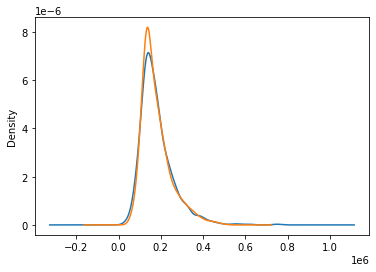

In [16]:
df_train['SalePrice'].plot(kind='density')
df_submit['SalePrice'].plot(kind='density')

In [17]:
X_cont = df_train[cont_vars]
pw = PowerTransformer()
X_cont_pow = pw.fit_transform(X_cont)

X_cont_pow = pd.DataFrame(X_cont_pow,index=X_cont.index,columns=['pw_'+col for col in X_cont.columns])
X_cont_pow.describe()

,pw_LotFrontage,pw_LotArea,pw_OverallQual,pw_OverallCond,pw_MasVnrArea,pw_BsmtFinSF1,pw_BsmtFinSF2,pw_BsmtUnfSF,pw_TotalBsmtSF,pw_1stFlrSF,...,pw_TotRmsAbvGrd,pw_Fireplaces,pw_WoodDeckSF,pw_OpenPorchSF,pw_EnclosedPorch,pw_3SsnPorch,pw_ScreenPorch,pw_PoolArea,pw_MiscVal,pw_YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1460.000000
mean,-3.321544e-16,7.056760e-17,-5.158735e-16,-6.028663e-16,7.300097e-17,-5.110068e-17,-6.448419e-17,2.068361e-16,4.696395e-16,-2.691302e-15,...,-3.260710e-16,6.083414e-17,1.460019e-17,1.082848e-16,-3.406712e-17,-7.543433e-17,-2.311697e-17,-1.946692e-17,0.000000,0.000024
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343,1.000343
min,-1.835103e+00,-3.651210e+00,-4.273884e+00,-6.127539e+00,-8.184522e-01,-1.353159e+00,-3.593841e-01,-2.064084e+00,-3.131482e+00,-3.938455e+00,...,-4.045724e+00,-1.027341e+00,-9.503365e-01,-1.071307e+00,-4.075947e-01,-1.292791e-01,-2.937848e-01,-6.940907e-02,-0.192177,-1.368874
25%,-3.109244e-01,-3.572852e-01,-7.831710e-01,-4.773871e-01,-8.184522e-01,-1.353159e+00,-3.593841e-01,-6.223486e-01,-5.481614e-01,-7.035661e-01,...,-9.473617e-01,-1.027341e+00,-9.503365e-01,-1.071307e+00,-4.075947e-01,-1.292791e-01,-2.937848e-01,-6.940907e-02,-0.192177,-0.613715
50%,2.449646e-01,8.093051e-02,-4.219247e-02,-4.773871e-01,-8.184522e-01,4.375882e-01,-3.593841e-01,5.013873e-02,-8.911794e-02,-3.893190e-02,...,-2.346272e-01,7.840047e-01,-9.503365e-01,4.313029e-01,-4.075947e-01,-1.292791e-01,-2.937848e-01,-6.940907e-02,-0.192177,0.140053
75%,6.364550e-01,4.736638e-01,6.674989e-01,4.405509e-01,1.196595e+00,8.031142e-01,-3.593841e-01,6.780913e-01,5.855461e-01,7.319279e-01,...,3.899207e-01,7.840047e-01,1.038121e+00,8.926390e-01,-4.075947e-01,-1.292791e-01,-2.937848e-01,-6.940907e-02,-0.192177,0.892349
max,5.139152e+00,6.431170e+00,2.653118e+00,2.698415e+00,1.542220e+00,2.481228e+00,2.783766e+00,2.535885e+00,8.590405e+00,4.316660e+00,...,3.421401e+00,2.168118e+00,1.518141e+00,1.889657e+00,2.457270e+00,7.735201e+00,3.403875e+00,1.440734e+01,5.203549,1.643336


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

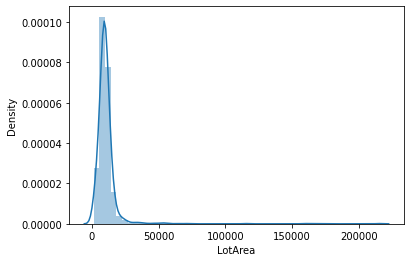

In [18]:
log_area = np.log(df_train['LotArea'])
sns.distplot(df_train['LotArea'])